In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
path = '/nobackup/jakravit/git/DE-WQ/experiments/cyanosat_chl_12nm_3nm/attr.csv'
attr = pd.read_csv(path,index_col=0)

In [99]:
wv = np.arange(500,800,3)
attr.index=wv

<AxesSubplot: >

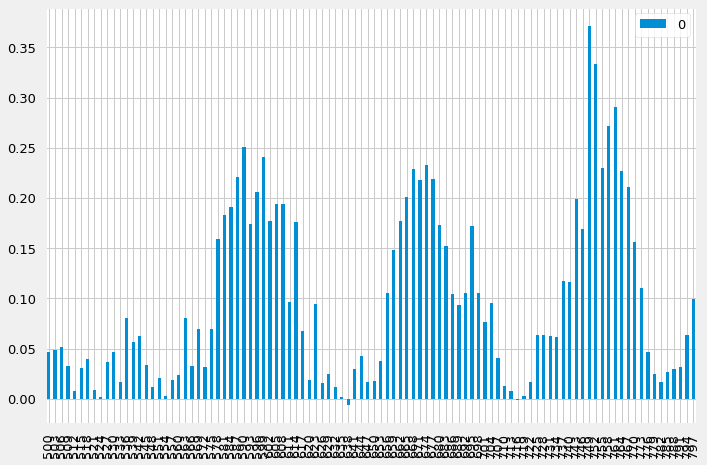

In [100]:
attr.plot.bar()

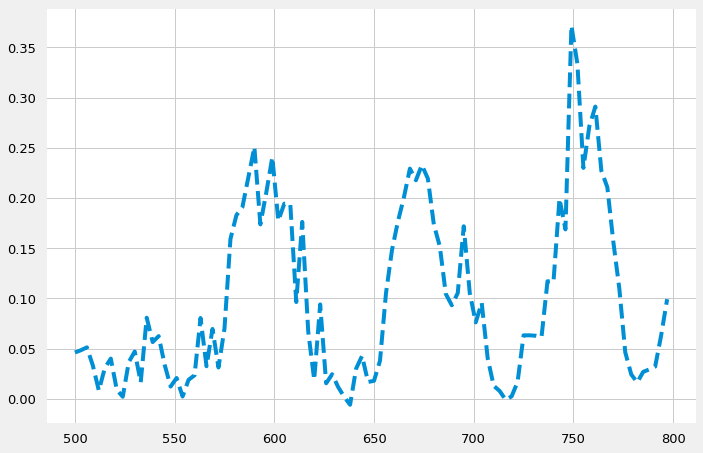

In [101]:
from scipy import interpolate, signal

f_interp = interpolate.interp1d(wv, attr.values[:,0], kind='cubic')
x2 = wv#[0::2]
y2 = f_interp(x2)
plt.plot(x2, y2, '--')

In [109]:
prom = .1
peaks, props = signal.find_peaks(y2, prominence=prom)
# peaks = peaks[:-1]
peakl = x2[peaks]

print(peaks)
print(props['prominences'])
print(peakl)

[30 58 83]
[0.24865391 0.23364611 0.35517011]
[590 674 749]


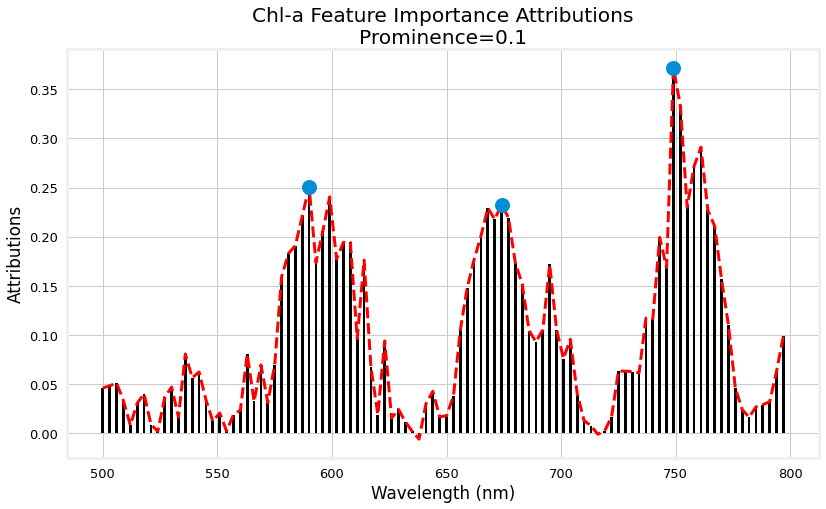

In [111]:
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

title = f'Chl-a Feature Importance Attributions\nProminence={prom}'
outpath = '/nobackup/jakravit/data/cyanosat/cases/plots/chl_12nm_3nm_rrs_attr_p2.png'

fig, ax = plt.subplots(figsize=(12,7), facecolor='white',)
ax.bar(wv,attr.values[:,0], width=1.2, align='center', color='k')
ax.plot(x2,y2,'--',color='red',lw=3)
ax.plot(x2[peaks], y2[peaks], "o", markersize=15, )
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Attributions')
ax.set_title(title)
ax.set_facecolor('white')

fig.savefig(outpath, bbox_inches='tight', dpi=300)



In [ ]:
# p2min = []
# p2max = []
# for p in peakl:
#     p2min.append(p-

In [94]:
rrspath = '/nobackup/jakravit/data/cyanosat/cyanosat_12nm_resolved_synthetic_rrs_3nm.csv'
data = pd.read_csv(rrspath, index_col=0)
rrs = data.filter(regex='^\d').astype(float)
rrs.columns = rrs.columns.astype(float)
meta = data.filter(regex='^[a-zA-Z]')

In [95]:
rrs2 = rrs.loc[:,peakl]

In [96]:
data2 = pd.concat([rrs2,meta], axis=1)

In [97]:
outpath = '/nobackup/jakravit/data/cyanosat/cases/'
data2.to_csv(outpath + 'PC_12nm_3nm_p1.csv')